# Instabot project (Part:2)

In [35]:
from selenium import webdriver

driver=webdriver.Chrome(executable_path="/Users/Sandeep/chromedriver")

driver.get("http://www.instagram.com")

## Function for Login to instagram

In [36]:
import time
def login_insta(username,password):
    
#     finding box to input username
    userbox=driver.find_element_by_name("username")
    userbox.click()
    
#     sending username as text
    userbox.send_keys(username)
    
#     finding input box for password
    password_box=driver.find_element_by_name("password")
    
#     sending password as text
    password_box.send_keys(password)

#     submitting username and password
    password_box.submit()
    
    time.sleep(3)
    
#     Checking if username password are correct and and are we logged in
    try:
        instagram_heading=driver.find_element_by_xpath("//h1[@class='NXVPg Szr5J  coreSpriteLoggedOutWordmark']")
        print("Please check your username and password")
        driver.refresh()
        ans="ERROR"
        return ans
    except:
        print("Welcome",username)
        time.sleep(3)
        
        #for handelling "TURN ON NOTIFICATION BOX" if any
        try:
            close_notification_box=driver.find_element_by_xpath("//button[@class='aOOlW   HoLwm ']")
            close_notification_box.click()
        except:
            None
#         for handeling popup to save login credentials (i click on not now)
        try:
            close_notification_box=driver.find_element_by_xpath("//button[@class='sqdOP yWX7d    y3zKF     ']")
            close_notification_box.click()
        except:
            None
            
            
        #for handelling "TURN ON NOTIFICATION BOX" if it occurs after save dialog
        try:
            close_notification_box=driver.find_element_by_xpath("//button[@class='aOOlW   HoLwm ']")
            close_notification_box.click()
        except:
            None
        ans="SUCCESS"
        print(ans)
        

In [37]:
login_insta("sandeepsng30@gmail.com","akshardham")


Welcome sandeepsng30@gmail.com
SUCCESS


# TASK 8

# TASK 8: Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2. Now Find the number of posts these handles have done in the previous 3 days.
3. Depict this information using a suitable graph.

## Function to extract first 10 username related to "Food"

In [38]:
def food_related_usernames():
    
#     locatig search box and clicking on it to activate
    search_box=driver.find_element_by_xpath("//div[@class='pbgfb Di7vw ']")
    search_box.click()
    
#     waiting for page to load
    time.sleep(2)

#     locatig search box input
    search__input=driver.find_element_by_xpath("//input[@class='XTCLo x3qfX focus-visible']")

#     sending search query i.e "food" to the search box
    search__input.send_keys("food")
    
#     waiting for dialog box with username and hashtags list to arrive
    time.sleep(4)

#     locating the dialog box
    drop_down=driver.find_element_by_xpath("//div[@class='fuqBx']")

#     converting the data to text to extract list of usernames
    data=drop_down.get_attribute("innerHTML")

    
    
        ############################# DATA CLEANING STARTS HERE ###################################
                            
#     for seperating each individual elment of grid/list
    l=data.split("<a")

#     creating a new list discarding all the hash tags
    new_l=[]
    for e in l:
        if "explore/" in e or len(e)==0:     #for eliminating hashtags and empty string 
#                                                 created due to split(one empty at last)) 
            None
        else:
            new_l.append(e)

    
#     this function discard all uneccesary text such as tags/ classes etc
    def clean(each):
        start_ind=each.index("Ap253")
        valuable=each[start_ind+7:]
        end_ind=valuable.index("<")
        absolute=valuable[:end_ind]
        return absolute


    food_usernames=[]
    
#     iterating over each element created by split at passing it to cleaning function
    for j in new_l:
        single_user=clean(j)
        food_usernames.append(single_user)
        
    result=food_usernames[:10]
    return result

In [39]:
first10_usernames=food_related_usernames()

In [44]:
first10_usernames

['foodtalkindia',
 'foodfashionflipflops',
 'foodie_incarnate',
 'yourfoodlab',
 'food_hunt_at_delhi',
 'lockdown_food_contest',
 'food',
 'dilsefoodie',
 'buzzfeedfood',
 'foodconnectindia']

## continue as it is

# The function below finds the 5 most followed pages among the 10 pages extracted by the previous function

In [48]:
def top_5_followed(first_ten):
    #creating a dictionary with number of follwers as keys and their usernames as values
    follower_dic={}
    
    #clearing search box for fresh start
    delete_search=driver.find_element_by_xpath("//div[@class='aIYm8 coreSpriteSearchClear']")
    delete_search.click()
    
    #iterating over all 10 usernames and collecting their follower count
    for i in first_ten:

        #locating search box and clicking on it
        search_box=driver.find_element_by_xpath("//div[@class='pbgfb Di7vw ']")
        search_box.click()

        #activating the search boox sending username to the search box
        search__input=driver.find_element_by_xpath("//input[@class='XTCLo x3qfX focus-visible']")
        search__input.send_keys(i)
        time.sleep(3)
        
        try:
            href_link="//a[@href='/"+i+"/']"

            # opening desired profile 
            desired_profile=driver.find_element_by_xpath(href_link)
            desired_profile.click()

        except:
            
            #try clause fails in some cases for example:"talesofourfood"
            #opening desired profile
            desired_profile2=driver.find_element_by_class_name("z556c")
            desired_profile2.click()

        time.sleep(2)
        #searching for the "followers" button and extracting text from it
        follower_tab=driver.find_element_by_partial_link_text("followers").text
        
                   ##  cleaning text to get the count of followers   ##


        follow_split=follower_tab.split(" ")
        raw_number=follow_split[0]

        if "," in raw_number:
            raw_number=int(raw_number.replace(",",""))
        elif "k" in raw_number:
            raw_number=raw_number.replace("k","")
            raw_number=int(float(raw_number)*1000)
        elif "m" in raw_number:
            raw_number=raw_number.replace("m","")
            raw_number=int(float(raw_number)*1000000)


        #adding to the dictionary
        follower_dic[int(raw_number)]=i

        driver.back()
        time.sleep(3)
    
    
    top_5=sorted(follower_dic,reverse=True)[:5]
    
    top_5_usernames=[]
    top_5_followers=[]
    for each in top_5:
        top_5_usernames.append(follower_dic[each])
        top_5_followers.append(each)
        
    return top_5_usernames,top_5_followers
    

In [49]:
top_5_profiles,top_5_follower_count=top_5_followed(first10_usernames)

In [50]:
top_5_profiles

['buzzfeedfood',
 'yourfoodlab',
 'dilsefoodie',
 'foodtalkindia',
 'foodie_incarnate']

In [51]:
top_5_follower_count

[3700000, 1200000, 471000, 296000, 193000]

### This function below gives us the list of posts from these pages within last 3 days

In [52]:
def find_count_of_post(top_5_profiles):
    post_count_list=[]
    
    for i in top_5_profiles:

        #locating search box and clicking on it
        search_box=driver.find_element_by_xpath("//div[@class='pbgfb Di7vw ']")
        search_box.click()

        #activating the search boox sending username to the search box
        search__input=driver.find_element_by_xpath("//input[@class='XTCLo x3qfX focus-visible']")
        search__input.send_keys(i)

        time.sleep(3)
        
        
        try:
            href_link="//a[@href='/"+i+"/']"

            # opening desired profile 
            desired_profile=driver.find_element_by_xpath(href_link)
            desired_profile.click()

        except:
            
            #try clause fails in some cases for example:"talesofourfood"
            #opening desired profile
            desired_profile2=driver.find_element_by_class_name("z556c")
            desired_profile2.click()

        time.sleep(3)
        
        #searching for the first post and opening it in slidshow mode by clicking on it
    
        open_post=driver.find_element_by_xpath("//div[@class='eLAPa']")
        open_post.click()
        time.sleep(3)
        
        #initializing count of post for each username to "0"
        count=0
        while True:
            
            #searching for the time stamp of posts such as "3 HOURS AGO" and extracting in text format
            post_time=driver.find_element_by_xpath("//a[@class='c-Yi7']").text
            
            if "SECOND" in post_time:
                count+=1
            elif "MINUTE" in post_time:
                count+=1
        
            elif "HOUR" in post_time:
                count+=1

            elif "DAY" in post_time:
                #To handle cases to segregate posts posted before 3 days count them
                list_split=post_time.split(" ")
                if int(list_split[0])<3:
                    count+=1
                else:
                    
                    #if posted more than 3 days ago them breaking the loop and stop counting
                    break
            else:
                break
                    
            #searching for next button in slidshow view and clicking on it
            next_button=driver.find_element_by_xpath("//a[@class=' _65Bje  coreSpriteRightPaginationArrow']")
            next_button.click()

            time.sleep(3)
        time.sleep(2)
        #After counting for a particular username is stoped we search for  close button (cross mark) of slidhshoe mode and click on it
        close_button=driver.find_element_by_xpath("//div[@class='                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG']")
        close_button.click()
        
        
        #Append the count of post to the list
        post_count_list.append(count)
        print(i,count)
        time.sleep(3)
    
    #returning count of posts in the same order as the username supplied
    return post_count_list

In [55]:
count_posts=find_count_of_post(top_5_profiles)

buzzfeedfood 0
yourfoodlab 3
dilsefoodie 3
foodtalkindia 5
foodie_incarnate 4


In [56]:
#to get some significant difference in size of bubbles in the scatterplot
#I am using size of the bubble to be a function of number of posts made by the particular username

count_bubble_size=[500*num for num in count_posts]

### Plotting a scatter plot to represent the information obtained

In [ ]:
#to get some significant difference in size of bubbles in the scatterplot
#I am using size of the bubble to be a function of number of posts made by the particular username

count_bubble_size=[500*num for num in count_posts]

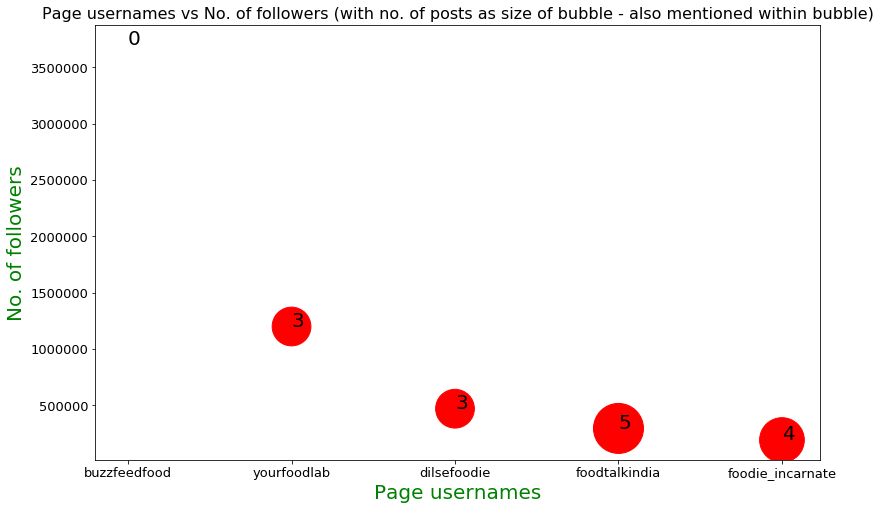

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
plt.scatter(top_5_profiles,top_5_follower_count,count_bubble_size,c="r")
plt.title("Page usernames vs No. of followers (with no. of posts as size of bubble - also mentioned within bubble)",fontsize=16)
plt.xlabel("Page usernames",fontsize=20,c="g")
plt.ylabel("No. of followers",fontsize=20,c="g")
for e in range(5):
    plt.text(e,top_5_follower_count[e],format(count_posts[e],".0f"),fontsize=20)
plt.tick_params(axis="both",which="major",labelsize=13)
plt.show()


# TASK 2: Identifying most frequent hashtags

In [ ]:
#Please go to home/feed before runing the cell below

In [58]:
import re

def collect_post_text(top_5_profiles):
    allwords_list=[]
    
    for i in top_5_profiles:

        #locating search box and clicking on it
        search_box=driver.find_element_by_xpath("//div[@class='pbgfb Di7vw ']")
        search_box.click()

        #activating the search boox sending username to the search box
        search__input=driver.find_element_by_xpath("//input[@class='XTCLo x3qfX focus-visible']")
        search__input.send_keys(i)

        time.sleep(3)
        
        
        try:
            href_link="//a[@href='/"+i+"/']"

            # opening desired profile 
            desired_profile=driver.find_element_by_xpath(href_link)
            desired_profile.click()

        except:
            
            #try clause fails in some cases for example:"talesofourfood"
            #opening desired profile
            desired_profile2=driver.find_element_by_class_name("z556c")
            desired_profile2.click()

        time.sleep(3)
        
        #searching for the first post and opening it in slidshow mode by clicking on it
    
        open_post=driver.find_element_by_xpath("//div[@class='eLAPa']")
        open_post.click()
        time.sleep(3)
        
        #iterating over first 10 posts by clicking on next button 9 times
        count=0

        while count<=9:
            #scrape the text for words and their frequencies
            
            #locating text body for the post and converting into text
            post_text=driver.find_element_by_class_name("C4VMK").text
            
            # using regular expression for splitting the text using multiple delimiters
            word_list=re.split(' |\n|,',post_text)
            
            #extending the the main list of all words accross all post of 5 profiles 
            allwords_list.extend(word_list)

            
            count+=1
            
            next_button=driver.find_element_by_xpath("//a[@class=' _65Bje  coreSpriteRightPaginationArrow']")
            next_button.click()

            time.sleep(3)
        
        #After seeing 10 posts particular username is stoped we search for  close button (cross mark) of slidhshoe mode and click on it
        close_button=driver.find_element_by_xpath("//div[@class='                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG']")
        close_button.click()
        
        time.sleep(3)
    
    #returning the list all words used by all 5 profiles
    return allwords_list

In [59]:
# extracting all words normal text as well as hashtags from posts

all_words=collect_post_text(top_5_profiles)

In [60]:
# filtering out and making a list of hashtags only
hashtags=[]
for each_word in all_words:
    if "#" in each_word:
        hashtags.append(each_word)

In [61]:
# using pandas to get frequencies of hashtags used

import pandas as pd
words_dataframe=pd.Series(hashtags)
sss=words_dataframe.value_counts()
sss

#dilsefoodie        10
#foodieincarnate     7
#recipes             5
#sanjyotkeer         5
#foodie              5
                    ..
#mangoicecream       1
#sushi               1
#stayhome            1
#cp                  1
#foodgasm            1
Length: 63, dtype: int64

In [62]:
# Creating a Pandas Dataframe of hashtags and their frequencies which can be easily converted to csv files for documentation

hashtag_words=sss.index
hashtag_frequencies=sss.values

df=pd.DataFrame(hashtag_words)
df["Hashtags"]=hashtag_words
df["hashtag_frequencies"]=hashtag_frequencies
del df[0]

In [63]:
df.head(10)

,Hashtags,hashtag_frequencies
0,#dilsefoodie,10
1,#foodieincarnate,7
2,#recipes,5
3,#sanjyotkeer,5
4,#foodie,5
5,#foodporn,4
6,#MyYFLstory,3
7,#indiancuisine,3
8,#foodstagram,3
9,#food,3


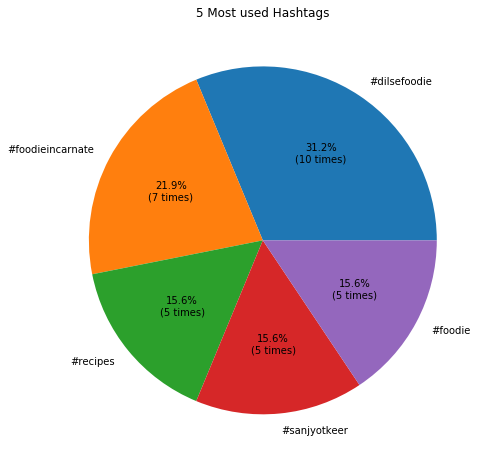

In [64]:
# Ploting the pie chart

sizes=sss.values[:5]
# print(sizes)
labels=sss.index[:5]

plt.figure(figsize=(8,8))

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d} times)".format(pct, absolute)


plt.title("5 Most used Hashtags")
plt.pie(sizes,labels=labels,autopct=lambda pct: func(pct, sizes))
plt.rcParams['font.size'] = 20

plt.show()

# Task 3: calculate average followers : likes ratio for the obtained handles.

## Followers : Likes ratio is calculated as follows:
### 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
### 2. Calculate the average likes for a handle.
### 3. Divide the average likes obtained from the number of followers of the handle to get the average    followers:like ratio of each handle.
### 4. Create a bar graph to depict the above obtained information.

In [65]:
import time
def find_average_likes(top_5_profiles):
    average_likes=[]
    
    for i in top_5_profiles:

        #locating search box and clicking on it
        search_box=driver.find_element_by_xpath("//div[@class='pbgfb Di7vw ']")
        search_box.click()

        #activating the search boox sending username to the search box
        search__input=driver.find_element_by_xpath("//input[@class='XTCLo x3qfX focus-visible']")
        search__input.send_keys(i)

        time.sleep(3)
        
        
        try:
            href_link="//a[@href='/"+i+"/']"

            # opening desired profile 
            desired_profile=driver.find_element_by_xpath(href_link)
            desired_profile.click()

        except:
            
            #try clause fails in some cases for example:"talesofourfood"
            #opening desired profile
            desired_profile2=driver.find_element_by_class_name("z556c")
            desired_profile2.click()

        time.sleep(3)
        
        #searching for the first post and opening it in slidshow mode by clicking on it
    
        open_post=driver.find_element_by_xpath("//div[@class='eLAPa']")
        open_post.click()
        time.sleep(3)
        
        #initializing count of post for each username to "0"
        count=0
        total_likes=0
        while count<=9:
            
            try:
                post_engagement_button=driver.find_element_by_xpath("//div[@class='Nm9Fw']")
                
                #to handle cases which gives num of likes directly (in the form  " *num* likes")
                if "like" in post_engagement_button.text:
                    #extracting text from html and then cleaning to get num of likes
                    text=post_engagement_button.text
                    num=text.split(" ")[0]
                    int_num=int(num.replace(",",""))
                    print(int_num)
                    total_likes+=int_num
                #to handle cases which gives the data in the form  " Liked by *username and *num* others 
                elif "Liked" in post_engagement_button.text:
                    #extracting text from html and then cleaning to get num of likes
                    likes_button=post_engagement_button.text
                    list_text=likes_button.split(" ")
                    num=list_text[-2][1:]
                    int_num=int(num.replace(",",""))+1
                    print(int_num)
                    total_likes+=int_num
                
            #To handle cases where post is a video and thus it shows num of views rather than likes
            except:
                
                #finding the views button and then clicking on it to see num of likes
                post_engagement_button=driver.find_element_by_xpath("//span[@class='vcOH2']")
                post_engagement_button.click()
                
                #findingthe likes data and extracting text from it
                post_likes_button=driver.find_element_by_xpath("//div[@class='vJRqr']")
                text=post_likes_button.text

                num=text.split(" ")[0]
                int_num=int(num.replace(",",""))
                print(int_num)
                total_likes+=int_num
                
                post_engagement_button=driver.find_element_by_xpath("//div[@class='QhbhU']")
                post_engagement_button.click()
    
    
    
    
            time.sleep(3)
            
            #searching for next button in slideshow view and clicking on it
            next_button=driver.find_element_by_xpath("//a[@class=' _65Bje  coreSpriteRightPaginationArrow']")
            next_button.click()
            count+=1

            time.sleep(3)
        
        # adding averge likes for this profile to the list
        average_likes.append(total_likes/10)
        print("Total likes for",i,"=",total_likes)
        print("average likes for",i,"=",total_likes/10)
        
        #After counting for a particular username is stoped we search for  close button (cross mark) of slidhshoe mode and click on it
        close_button=driver.find_element_by_xpath("//div[@class='                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG']")
        close_button.click()                                    
        
        time.sleep(3)
    
    #returning average likes in the same order as the username supplied
    return average_likes

In [66]:
average_likes_list=average_likes_list=find_average_likes(top_5_profiles)

5369
3661
5103
12288
5930
3912
6742
2967
5189
7845
Total likes for buzzfeedfood = 59006
average likes for buzzfeedfood = 5900.6
35991
21590
5981
30177
43599
26437
34596
25720
40158
5656
Total likes for yourfoodlab = 269905
average likes for yourfoodlab = 26990.5
4858
11316
6304
6021
6813
9240
7764
8713
8024
11166
Total likes for dilsefoodie = 80219
average likes for dilsefoodie = 8021.9
278
142
649
2521
475
268
1156
297
169
342
Total likes for foodtalkindia = 6297
average likes for foodtalkindia = 629.7
2624
4650
2754
1584
3965
4306
4396
6053
3714
10449
Total likes for foodie_incarnate = 44495
average likes for foodie_incarnate = 4449.5


In [68]:
# Creating a list of ratios corresponding to top 5 usernames
ratio_follower_to_likes=[]
for indivi in range(5):
    ratio=top_5_follower_count[indivi]/average_likes_list[indivi]
    ratio_follower_to_likes.append(ratio)
# print(ratio_follower_to_likes)

<function matplotlib.pyplot.show(*args, **kw)>

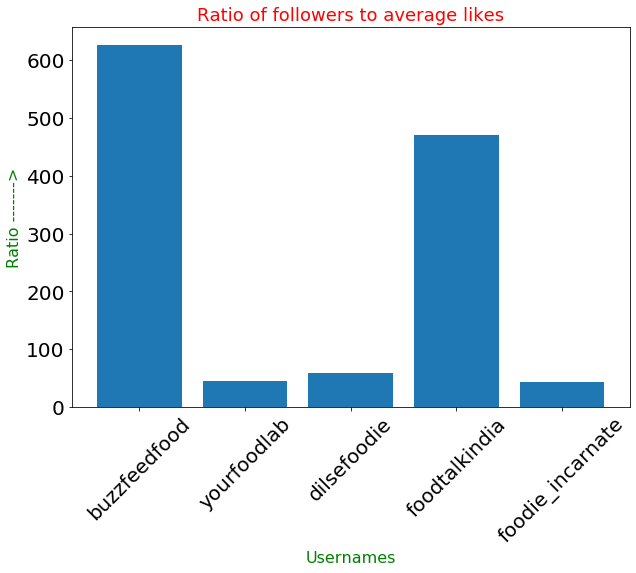

In [69]:
# Plotting bar graph using matplotlib

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Ratio of followers to average likes",fontsize=18,c="r")
plt.bar(top_5_profiles,ratio_follower_to_likes)
plt.xticks(rotation=45)
plt.xlabel("Usernames",fontsize=16,c="g")
plt.ylabel("Ratio ------->",fontsize=16,c="g")
plt.show